# PageRank algorithm

In [1]:
import warnings
import networkx as nx

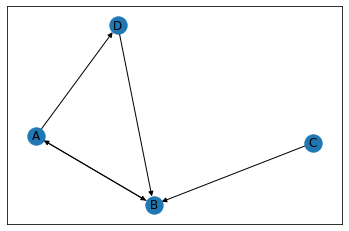

In [2]:
G = nx.DiGraph()
G.add_node("A")
G.add_node("B")
G.add_node("C")
G.add_node("D")

G.add_edge("A", "B", weight=1)
G.add_edge("A", "D", weight=1)
G.add_edge("B", "A", weight=1)
G.add_edge("C", "B", weight=1)
G.add_edge("D", "B", weight=1)

nx.draw_networkx(G)

In [4]:
def page_rank(G, dp=0.85, max_iterations=100, tolerance=0.01):
    # initialization
    pr_values = {
        node: 1.0
        for node in G.nodes
    }
    
    # degree and number of nodes
    out_degree = G.out_degree()
    number_of_nodes = G.number_of_nodes()
    
    iteration_number = 0
    while True:
        
        # copy PR values from previous iteration
        old_pr_values = dict(pr_values)
        # PR values for this iteration, initialized to 1-dp
        pr_values = {
            node: 1 - dp
            for node in G.nodes
        }
        
        # iterate over all nodes
        for node in G.nodes:
            # send message to neighbors
            for neighbor in G.neighbors(node):
                pr_values[neighbor] += dp * old_pr_values[node] / out_degree[node]
        
        # check stop criteria
        convergence = sum(abs(pr_values[n] - old_pr_values[n]) for n in G.nodes) / number_of_nodes
        if convergence < tolerance:
            break
        iteration_number += 1
        if iteration_number > max_iterations:
            warnings.warn("Max number of iterations reached")
            break
    # print(iteration_number)
    return pr_values


page_rank(G, max_iterations=10)

{'A': 1.500217529208212,
 'B': 1.570034235426248,
 'C': 0.15000000000000002,
 'D': 0.7797482353655394}